# Cryptocurrency Price Analysis

# Author :- Saurabh Arvind Parab

# Importing libraries


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
#load bitcoin data
btc_master = pd.read_csv(r'C:\Users\Saurabh\Downloads\archive\gemini_BTCUSD_2020_1min.csv')

#load ethereum data
eth_master = pd.read_csv(r'C:\Users\Saurabh\Downloads\archive\gemini_ETHUSD_2020_1min.csv')

#load litecoin data
ltc_master = pd.read_csv(r'C:\Users\Saurabh\Downloads\archive\gemini_LTCUSD_2020_1min.csv')

# Data Exploration

In [4]:
#Check the data dimensions for bitcoin
btc_master.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.618880e+12,4/20/2021 0:02,BTCUSD,55717.47,55723.00,55541.69,55541.69,2.406734
1,1.618880e+12,4/20/2021 0:01,BTCUSD,55768.94,55849.82,55711.74,55717.47,0.573458
2,1.618880e+12,4/20/2021 0:00,BTCUSD,55691.79,55793.15,55691.79,55768.94,3.309904
3,1.618880e+12,4/19/2021 23:59,BTCUSD,55777.86,55777.86,55677.92,55691.79,0.684934
4,1.618880e+12,4/19/2021 23:58,BTCUSD,55803.50,55823.88,55773.08,55777.86,0.477225


In [5]:
btc_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658065 entries, 0 to 658064
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unix Timestamp  658065 non-null  float64
 1   Date            658065 non-null  object 
 2   Symbol          658065 non-null  object 
 3   Open            658065 non-null  float64
 4   High            658065 non-null  float64
 5   Low             658065 non-null  float64
 6   Close           658065 non-null  float64
 7   Volume          658065 non-null  float64
dtypes: float64(6), object(2)
memory usage: 40.2+ MB


In [44]:
eth_master.shape

(658059, 3)

In [7]:
eth_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658059 entries, 0 to 658058
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unix Timestamp  658059 non-null  float64
 1   Date            658059 non-null  object 
 2   Symbol          658059 non-null  object 
 3   Open            658059 non-null  float64
 4   High            658059 non-null  float64
 5   Low             658059 non-null  float64
 6   Close           658059 non-null  float64
 7   Volume          658059 non-null  float64
dtypes: float64(6), object(2)
memory usage: 40.2+ MB


In [45]:
ltc_master.shape

(658011, 3)

In [9]:
ltc_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658011 entries, 0 to 658010
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unix Timestamp  658011 non-null  float64
 1   Date            658011 non-null  object 
 2   Symbol          658011 non-null  object 
 3   Open            658011 non-null  float64
 4   High            658011 non-null  float64
 5   Low             658011 non-null  float64
 6   Close           658011 non-null  float64
 7   Volume          658011 non-null  float64
dtypes: float64(6), object(2)
memory usage: 40.2+ MB


Litecoin data is 54 records short compared to bitcoin and 48 records short compared to ethereum data.

Looking at the dataframe info there are no null values in any dataset


# Data cleaning 

In [10]:
#Convert the object type Date column to datetime type
btc_master['Date'] = pd.to_datetime(btc_master['Date'], format='%m/%d/%Y %H:%M')
eth_master['Date'] = pd.to_datetime(eth_master['Date'], format='%m/%d/%Y %H:%M')
ltc_master['Date'] = pd.to_datetime(ltc_master['Date'], format='%m/%d/%Y %H:%M')

# Drop unnecessary columns 
As we are trying to understand the correlation between the currencies over a year, the columns of intrest will be Date, close and volume. Apart from these three columns we can drop rest of the data from the dataset.

In [11]:
#drop from bitcoin
btc_master.drop(['Unix Timestamp','Symbol','Open', 'High','Low'], axis = 1, inplace = True)
#drop from ethereum 
eth_master.drop(['Unix Timestamp','Symbol','Open', 'High','Low'], axis = 1, inplace = True)
#drop from litecoin
ltc_master.drop(['Unix Timestamp','Symbol','Open', 'High','Low'], axis = 1, inplace = True)

ltc_master.columns

Index(['Date', 'Close', 'Volume'], dtype='object')

Find missing data 
As we noticed that not all three datasets have the same number of records, let us analyse and understand what data is missing.

In [12]:
#get all the records in bitcoin dataset but not in ethereum dataset
btc_master[~(btc_master['Date'].isin(eth_master["Date"]))]

,Date,Close,Volume
12952,2021-04-11 00:08:00,59757.12,0.007522
14393,2021-04-10 00:03:00,58115.69,0.043307
43191,2021-03-21 00:04:00,58120.76,7.889050
63349,2021-03-07 00:06:00,49109.05,0.032708
93581,2021-02-14 00:08:00,47252.35,0.119529
103657,2021-02-07 00:07:00,39158.21,2.360374
109416,2021-02-03 00:04:00,35457.78,0.818440
113734,2021-01-31 00:06:00,34328.75,2.480243
123813,2021-01-24 00:05:00,31781.39,0.083153
143970,2021-01-10 00:04:00,40499.99,0.164603


In [13]:
#get all the records in ethereum dataset but not in bitcoin dataset
eth_master[~(eth_master['Date'].isin(btc_master["Date"]))]

,Date,Close,Volume
0,2021-04-20 00:03:00,2154.38,0.701288
12953,2021-04-11 00:04:00,2130.88,0.000000
93579,2021-02-14 00:03:00,1818.84,0.269269
103655,2021-02-07 00:03:00,1675.69,2.573782
174201,2020-12-20 00:02:00,656.70,0.000000
251959,2020-10-25 00:02:00,412.22,0.000000
289398,2020-09-29 00:01:00,352.50,0.000000
295159,2020-09-24 00:02:00,320.00,0.000000
341243,2020-08-20 00:01:00,408.61,0.000000
503971,2020-04-23 00:01:00,183.37,0.000000


In [14]:
#get all the records in litecoin dataset but not in bitcoin dataset
ltc_master[~(ltc_master['Date'].isin(btc_master["Date"]))].count()

Date      47
Close     47
Volume    47
dtype: int64

In [15]:
#get all the records in litecoin dataset but not in ethereum dataset
ltc_master[~(ltc_master['Date'].isin(eth_master["Date"]))].count()

Date      41
Close     41
Volume    41
dtype: int64

Looking at the records missing, there does not seem to be any obvious pattern as to why the data is missing. We have the data by the minute of the hour, for understanding the correlation we plan to aggregate the currency data by day. As we do not have more than a couple of minutes data missing for some days the missing data proportion is negligible in this usecase. Hence, the missing values need not be treated.

# Data aggregation 

# Bitcoin

In [16]:
#Loose the time information
btc_master['Date'] = btc_master['Date'].dt.date

#Aggregate by date
btc_grouped = pd.pivot_table(btc_master, values=['Close', 'Volume'], index=['Date'],
                    aggfunc={'Close': np.mean,
                             'Volume': np.sum})

btc_grouped.head()


,Close,Volume
Date,,
2020-01-01,7195.641243,776.641615
2020-01-02,7072.362910,984.141603
2020-01-03,7215.680840,1292.330594
2020-01-04,7320.664035,402.636843
2020-01-05,7429.535438,554.773602


In [17]:
btc_grouped.shape

(476, 2)

# Ethereum

In [18]:
#Loose the time information
eth_master['Date'] = eth_master['Date'].dt.date

#Aggregate by date
eth_grouped = pd.pivot_table(eth_master, values=['Close', 'Volume'], index=['Date'],
                    aggfunc={'Close': np.mean,
                             'Volume': np.sum})
eth_grouped.head()

,Close,Volume
Date,,
2020-01-01,130.576681,10641.079145
2020-01-02,128.530792,11842.451144
2020-01-03,130.885833,22800.226361
2020-01-04,133.554104,7537.048701
2020-01-05,136.036493,7015.126626


In [19]:
eth_grouped.shape

(476, 2)

# Litecoin

In [20]:
#Loose the time information
ltc_master['Date'] = ltc_master['Date'].dt.date

#Aggregate by date
ltc_grouped = pd.pivot_table(ltc_master, values=['Close', 'Volume'], index=['Date'],
                    aggfunc={'Close': np.mean,
                             'Volume': np.sum})
ltc_grouped.head()

,Close,Volume
Date,,
2020-01-01,41.603819,1149.199683
2020-01-02,40.708660,5119.431567
2020-01-03,41.014042,6299.303403
2020-01-04,42.302889,1828.613739
2020-01-05,43.264583,6388.375047


In [21]:
ltc_grouped.shape

(476, 2)

Once the data is aggregated we can see we have data for all the three currencies for 476 days.

# What is the highest average closing value between Jan-2020 and 2021-04-14?

Highest average value of BTC  63451.63713194449 was recorded on  2021-04-14
Highest average value of ETH  2461.6089722222237 was recorded on  2021-04-15
Highest average value of LTC  318.2231249999997 was recorded on  2021-04-17


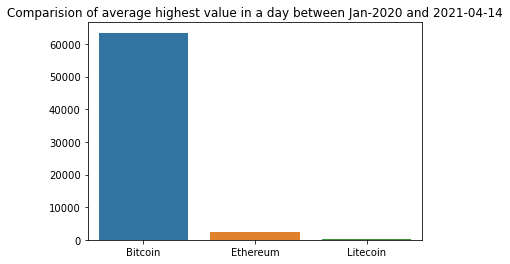

In [22]:
btc = btc_grouped['Close'].max()
eth = eth_grouped['Close'].max()
ltc = ltc_grouped['Close'].max()

#What is the highest closing value of Bitcoin and when
print("Highest average value of BTC ", btc,"was recorded on ",btc_grouped[btc_grouped['Close'] == btc].index.values[0])

#What is the highest closing value of Ethereum and when
print("Highest average value of ETH ", eth,"was recorded on ",eth_grouped[eth_grouped['Close'] == eth].index.values[0])

#What is the highest closing value of Litecoin and when
print("Highest average value of LTC ", ltc,"was recorded on ",ltc_grouped[ltc_grouped['Close'] == ltc].index.values[0])


sns.barplot(x = ["Bitcoin","Ethereum","Litecoin"], y = [btc,eth,ltc])
plt.title("Comparision of average highest value in a day between Jan-2020 and 2021-04-14")
plt.show()

# What is the highest volume transacted in one day between Jan-2020 and 2021-04-14?

Highest volume of BTC  18928.80104024598 was recorded on  2020-03-13
Highest volume of ETH  206706.02655481015 was recorded on  2020-03-12
Highest volume of LTC  204353.83438320018 was recorded on  2021-01-11


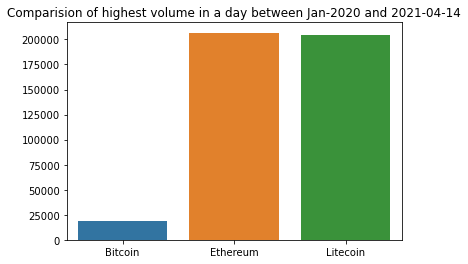

In [23]:
btc = btc_grouped['Volume'].max()
eth = eth_grouped['Volume'].max()
ltc = ltc_grouped['Volume'].max()


#What is the highest closing volume of Bitcoin and when
print("Highest volume of BTC ", btc,"was recorded on ",
      btc_grouped[btc_grouped['Volume'] == btc].index.values[0])

#What is the highest closing volume of Ethereum and when
print("Highest volume of ETH ", eth,"was recorded on ",
     eth_grouped[eth_grouped['Volume'] == eth].index.values[0])

#What is the highest closing volume of Litecoin and when
print("Highest volume of LTC ", ltc,"was recorded on ",
     ltc_grouped[ltc_grouped['Volume'] == ltc].index.values[0])

sns.barplot(x = ["Bitcoin","Ethereum","Litecoin"], y = [btc,eth,ltc])
plt.title("Comparision of highest volume in a day between Jan-2020 and 2021-04-14")
plt.show()

 Far more number of ethereum and litecoins have been transacted compared to bitcoins



# What was the average closing value when the highest volume was transacted between Jan-2020 and 2021-04-14


In [24]:
btc = btc_grouped[btc_grouped['Volume'] == btc_grouped['Volume'].max()]['Close'].values[0]
eth = eth_grouped[eth_grouped['Volume'] == eth_grouped['Volume'].max()]['Close'].values[0]
ltc = ltc_grouped[ltc_grouped['Volume'] == ltc_grouped['Volume'].max()]['Close'].values[0]

#What is the closing value of Bitcoin and when the highest volume was transacted 
print("Highest volume of BTC was", btc_grouped['Volume'].max(),"and mean closing value on that day was",btc)

#What is the highest closing volume of Ethereum and when
print("Highest volume of ETH ", eth_grouped['Volume'].max(),"and mean closing value on that day was ",eth)

#What is the highest closing volume of Litecoin and when
print("Highest volume of LTC ", ltc_grouped['Volume'].max(),"and mean closing value on that day was ",ltc)

Highest volume of BTC was 18928.80104024598 and mean closing value on that day was 5313.687326388864
Highest volume of ETH  206706.02655481015 and mean closing value on that day was  154.35353472222226
Highest volume of LTC  204353.83438320018 and mean closing value on that day was  139.52608333333316


# Was the average closing value at its lowest when highest volume was transacted


In [25]:
#What is the closing value of Bitcoin and when the highest volume was transacted 
print("Lowest average closing value of BTC ", btc_grouped['Close'].min())

#What is the closing value of Bitcoin and when the highest volume was transacted 
print("Lowest average closing value of ETH ", eth_grouped['Close'].min())

#What is the closing value of Bitcoin and when the highest volume was transacted 
print("Lowest average closing value of LTC ", ltc_grouped['Close'].min())

Lowest average closing value of BTC  4987.150173611111
Lowest average closing value of ETH  112.70609027777778
Lowest average closing value of LTC  33.027368055555606


Interestingly, the highest volumn was not transacted when the average closing value was at its least.



# How did the average closing value vary by time for bitcoin


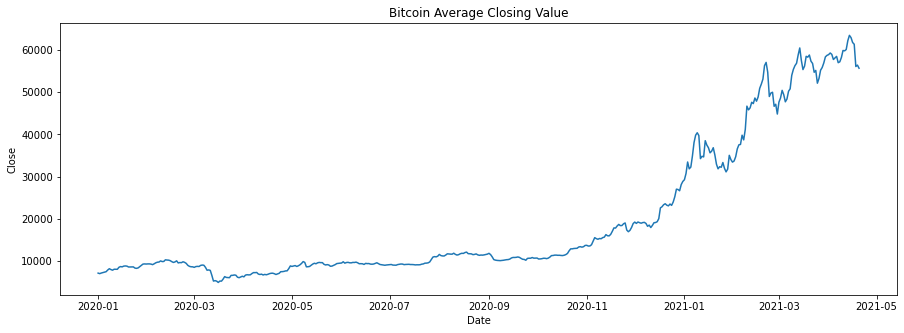

In [30]:
plt.figure(figsize=[15,5])
plt.title("Bitcoin Average Closing Value")
sns.lineplot(x = btc_grouped.index , y = 'Close', data = btc_grouped)
plt.show()

The average closing price seem to be under 20K through out 2020. However, towards the end of 2020 it picked up the pace and continued to grow.

# How did the average closing value vary by time for Etherus

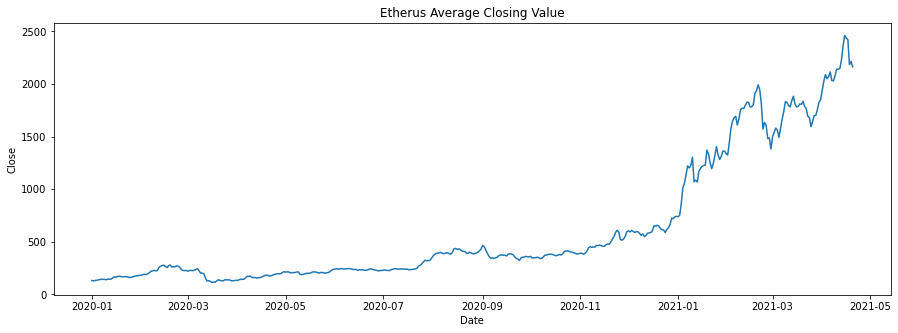

In [31]:
plt.figure(figsize=[15,5])
plt.title("Etherus Average Closing Value")
sns.lineplot(x = eth_grouped.index , y = 'Close', data = eth_grouped)
plt.show()

The average closing price seem to be under 1K through out 2020. However, from 2021 it picked up the pace and continued to grow

# How did the average closing value vary by time for LiteCoin

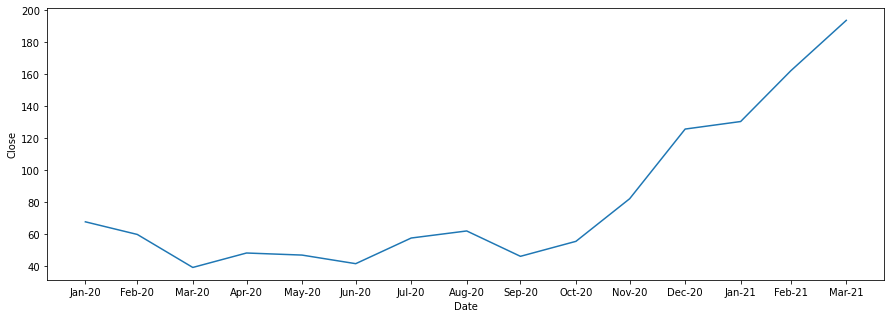

In [35]:
plt.figure(figsize=[15,5])
sns.lineplot(x = ltc_grouped.asfreq('M').index , y = 'Close', data = ltc_grouped.asfreq('M'))
plt.xticks(ticks = ltc_grouped.asfreq('M').index, labels = ['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20',
                                                            'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20',
                                                           'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21'])
plt.show()

The average closing price seem to be well under $150 through out 2020. However, from October 2020 litecoin value continued to grow.

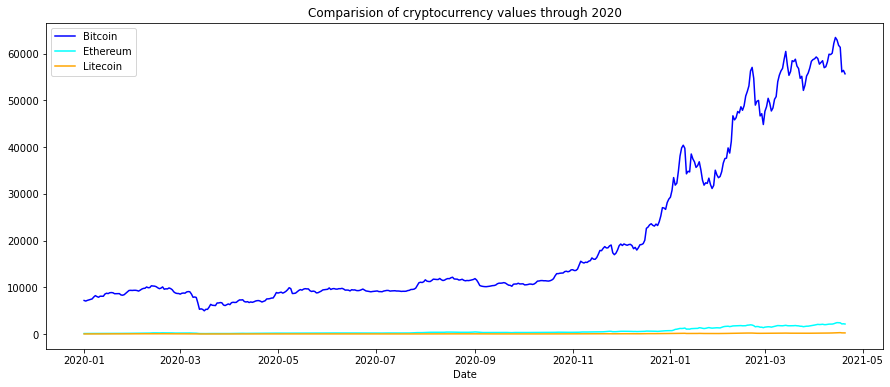

In [36]:
plt.figure(figsize=(15,6))
btc_grouped['Close'].plot(c='blue')
eth_grouped['Close'].plot(c='cyan')
ltc_grouped['Close'].plot(c='orange')
plt.title('Comparision of cryptocurrency values through 2020')
plt.legend(('Bitcoin','Ethereum', 'Litecoin'))
plt.show()

Because of the huge difference in value of the bitcoin and other currencies we cannot really observe any trend in this Y-Scale. Let us change to a log scale and see how the graph looks

# Analysing the combined trends 


# Average closing value

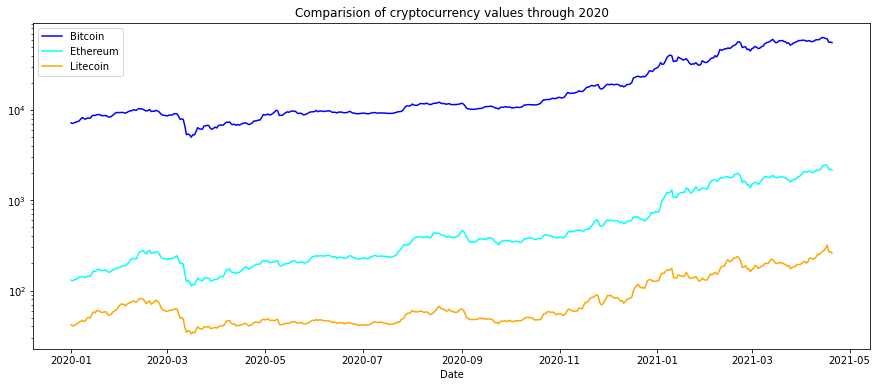

In [37]:
#Plot all the three currencies together to understand the trend of average closing value by day
plt.figure(figsize=(15,6))
btc_grouped['Close'].plot(c='blue')
eth_grouped['Close'].plot(c='cyan')
ltc_grouped['Close'].plot(c='orange')
plt.title('Comparision of cryptocurrency values through 2020')
plt.legend(('Bitcoin','Ethereum', 'Litecoin'))
plt.yscale('log')
plt.show()

The log Y-Scale gives us a much better graph. All the three coins seem to follow an almost similar trend over the year 2020. Inspite of large differences in the average closing value the trend of value increase or decrease looks similar. This graph indicates a strong correlation of average closing value for all the three currencies. We can confirm this by further analysing the datasets.

# Closing volume

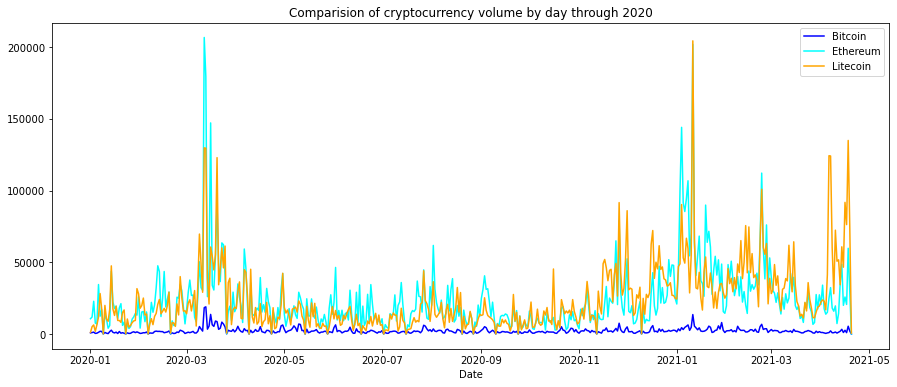

In [38]:
#Plot all the three currencies together to understand the trend of volume transcted by day
plt.figure(figsize=(15,6))
btc_grouped['Volume'].plot(c='blue')
eth_grouped['Volume'].plot(c='cyan')
ltc_grouped['Volume'].plot(c='orange')
plt.title('Comparision of cryptocurrency volume by day through 2020')
plt.legend(('Bitcoin','Ethereum', 'Litecoin'))
#plt.yscale('log')
plt.show()

We can clearly see that ethereum and litecoin have been transcated in much more volume compared to bitcoin. One hypothesis is the value of the coin could be a reason behind this difference.

# Correlation 

Let us merge all the three data sets to analyse the correlation of average closing value and the volume of all the three currencies

In [39]:
#Merge bitcoin and ethereum data
btc_eth = pd.merge(btc_grouped, eth_grouped, suffixes=('_btc', '_eth'), left_index=True, right_index=True)
btc_eth.head()

,Close_btc,Volume_btc,Close_eth,Volume_eth
Date,,,,
2020-01-01,7195.641243,776.641615,130.576681,10641.079145
2020-01-02,7072.362910,984.141603,128.530792,11842.451144
2020-01-03,7215.680840,1292.330594,130.885833,22800.226361
2020-01-04,7320.664035,402.636843,133.554104,7537.048701
2020-01-05,7429.535438,554.773602,136.036493,7015.126626


In [40]:
#Merge litecoin with other two
btc_eth_ltc = pd.merge(btc_eth, ltc_grouped, left_index=True, right_index=True)
btc_eth_ltc.rename(columns={"Close": "Close_ltc", "Volume": "Volume_ltc"}, inplace=True)
btc_eth_ltc.head()

,Close_btc,Volume_btc,Close_eth,Volume_eth,Close_ltc,Volume_ltc
Date,,,,,,
2020-01-01,7195.641243,776.641615,130.576681,10641.079145,41.603819,1149.199683
2020-01-02,7072.362910,984.141603,128.530792,11842.451144,40.708660,5119.431567
2020-01-03,7215.680840,1292.330594,130.885833,22800.226361,41.014042,6299.303403
2020-01-04,7320.664035,402.636843,133.554104,7537.048701,42.302889,1828.613739
2020-01-05,7429.535438,554.773602,136.036493,7015.126626,43.264583,6388.375047


In [41]:
#Corelation between the currencies
btc_eth_ltc.corr()

,Close_btc,Volume_btc,Close_eth,Volume_eth,Close_ltc,Volume_ltc
Close_btc,1.000000,0.019898,0.987148,0.230203,0.978353,0.450823
Volume_btc,0.019898,1.000000,0.023653,0.799471,0.018683,0.639422
Close_eth,0.987148,0.023653,1.000000,0.225287,0.975283,0.455818
Volume_eth,0.230203,0.799471,0.225287,1.000000,0.258728,0.736889
Close_ltc,0.978353,0.018683,0.975283,0.258728,1.000000,0.495338
Volume_ltc,0.450823,0.639422,0.455818,0.736889,0.495338,1.000000


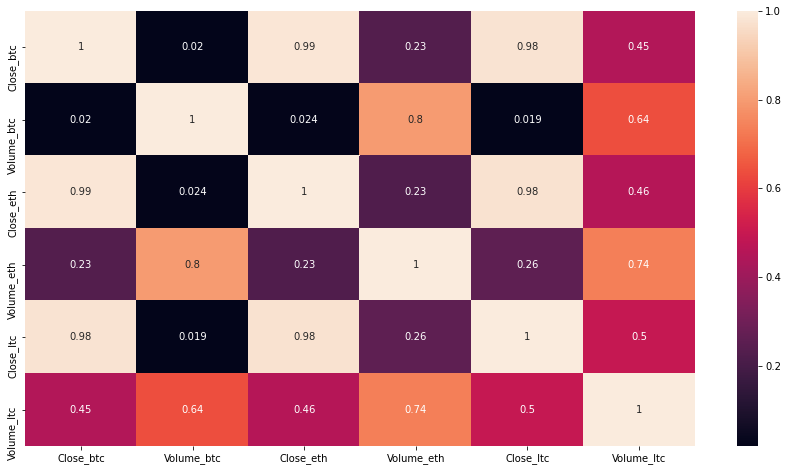

In [42]:
plt.figure(figsize = (15,8))
sns.heatmap(btc_eth_ltc.corr(), annot = True)
plt.show()

We can see that the average closing value of all the three currencies are strongly correlated. This validates the trends we observed in the line graph. The trend of increase or decrease of cryptocurrencies value is similar across all the three currencies we analyzed here. Even though volume transacted is not as strongly correlated as the value, we can still observe a good correlation value between the volume transacted of the currencies.

It will be interesting to understand the factors influencing these trends!!